In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Importing Data

In [189]:
datamart_rfm= pd.read_csv('retail_online_cohortRFM_segmentation.csv', )
datamart_rfm= datamart_rfm.set_index('CustomerID')
datamart_rfm= datamart_rfm[['Recency','Frequency','MonetaryValue']]
datamart_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


## Data Preparation

In [196]:
datamart_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4339 non-null   int64  
 1   Frequency      4339 non-null   int64  
 2   MonetaryValue  4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [190]:
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4339.000000,4339.000000,4339.000000
mean,92.518322,91.708689,2053.793018
std,100.009747,228.792852,8988.248381
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,307.245000
50%,51.000000,41.000000,674.450000
75%,142.000000,100.000000,1661.640000
max,374.000000,7847.000000,280206.020000


C:\Users\Rija\Programs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


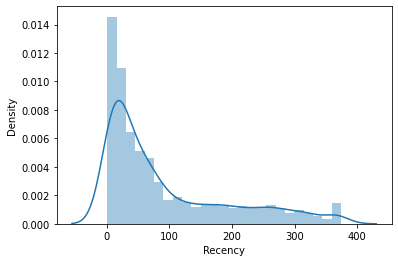

In [191]:
#Managing Skewed Variable
sns.distplot(datamart_rfm['Recency']) # variable Recency
plt.show()

C:\Users\Rija\Programs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


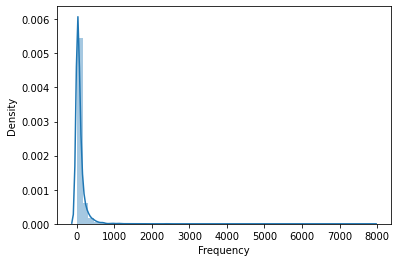

In [192]:
sns.distplot(datamart_rfm['Frequency']) # variable Frequency
plt.show()

C:\Users\Rija\Programs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


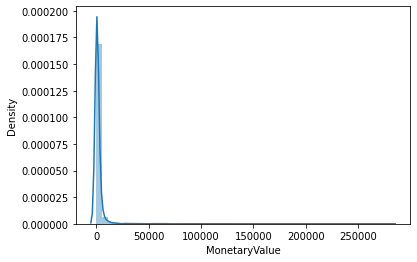

In [193]:
sns.distplot(datamart_rfm['MonetaryValue']) # variable Frequency
plt.show()

C:\Users\Rija\Programs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


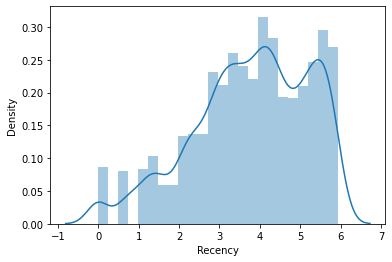

In [194]:
#Data transformation
frequency_log= np.log(datamart_rfm['Recency'])
sns.distplot(frequency_log)
plt.show()

C:\Users\Rija\Programs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


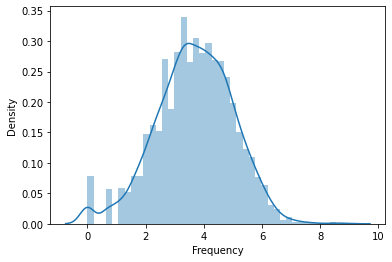

In [195]:
frequency_log= np.log(datamart_rfm['Frequency'])
sns.distplot(frequency_log)
plt.show()

<AxesSubplot:>

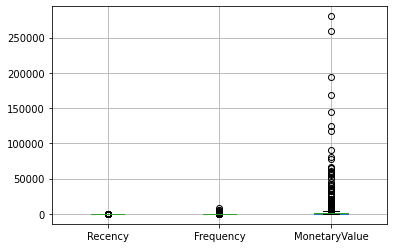

In [197]:
datamart_rfm.boxplot()

In [198]:
datamart_log = np.log(datamart_rfm)
datamart_log= datamart_log[~(datamart_log['Frequency'] == 0)]
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)
datamart_normalized

array([[-2.1374689 ,  1.17202169,  1.41551174],
       [ 0.39864934, -0.24611753,  0.70755961],
       [-0.56213637,  0.44008783,  0.68948508],
       ...,
       [-1.1674149 , -1.00652066, -1.16367811],
       [-1.6524419 ,  2.31295796,  0.83159216],
       [ 0.00938901,  0.40646613,  0.72539352]])

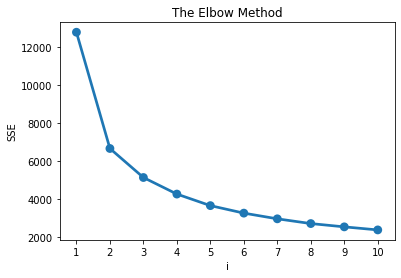

In [199]:
#Elbow criterion method
sse= {}
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[i]= kmeans.inertia_ # sum of squared distances to closest cluster center

# Plot SSE for each *i*
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('i'); plt.ylabel('SSE')
plt.show()

based on the elbow method, number of cluster is 3

In [200]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_

In [201]:
# Analyzing average RFM value for each variable
# Create a cluster label column in the original DataFrame
datamart_rfm_k2 = datamart_rfm[~(datamart_rfm['Frequency'] == 1)].assign(Cluster = cluster_labels)
# Calculate average RFM values and size for each cluster
datamart_rfm_k2.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          12.0     273.0        6818.0   903
1          66.0      70.0        1213.0  1781
2         163.0      17.0         314.0  1583

In [203]:
datamart_rfm_filter= datamart_rfm[~(datamart_rfm['Frequency'] == 1)]
datamart_rfm_filter

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [204]:
# Prepare data for a snake plot
datamart_normalized = pd.DataFrame(datamart_normalized,
index=datamart_rfm_filter.index,
columns=datamart_rfm_filter.columns)
datamart_normalized['Cluster'] = datamart_rfm_k2['Cluster'] + 1
datamart_normalized

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,-2.137469,1.172022,1.415512,1
12348.0,0.398649,-0.246118,0.707560,2
12349.0,-0.562136,0.440088,0.689485,2
12350.0,1.391648,-0.727457,-0.653548,3
12352.0,-0.114943,0.562024,0.976639,2
...,...,...,...,...
18280.0,1.315410,-1.152597,-1.152169,3
18281.0,1.015132,-1.438365,-1.802958,3
18282.0,-1.167415,-1.006521,-1.163678,3


In [210]:
datamart_normalized['Cluster'].value_counts()

2    1781
3    1583
1     903
Name: Cluster, dtype: int64

In [205]:
# Melt the data into a long format so RFM values and metric names are stored in 1 column each
datamart_melt = pd.melt(datamart_normalized.reset_index(),
id_vars=['Cluster'],
value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Attribute',
value_name='Value')
datamart_melt


,Cluster,Attribute,Value
0,1,Recency,-2.137469
1,2,Recency,0.398649
2,2,Recency,-0.562136
3,3,Recency,1.391648
4,2,Recency,-0.114943
...,...,...,...
12796,3,MonetaryValue,-1.152169
12797,3,MonetaryValue,-1.802958
12798,3,MonetaryValue,-1.163678
12799,1,MonetaryValue,0.831592


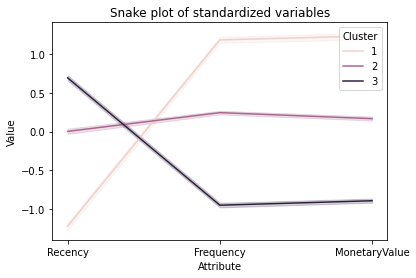

In [206]:
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)
plt.title('Snake plot of standardized variables')
plt.show()

In [207]:
# relative importance of segment attributes
cluster_avg = datamart_normalized.groupby(['Cluster']).mean()
population_avg = datamart_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
1,-1.01,-0.99,-1.0
2,-1.00,-1.00,-1.0
3,-0.99,-1.01,-1.0


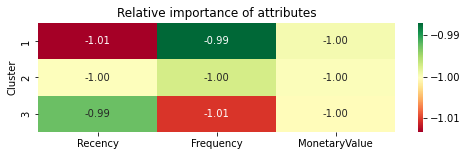

In [208]:
# Plot heatmap
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

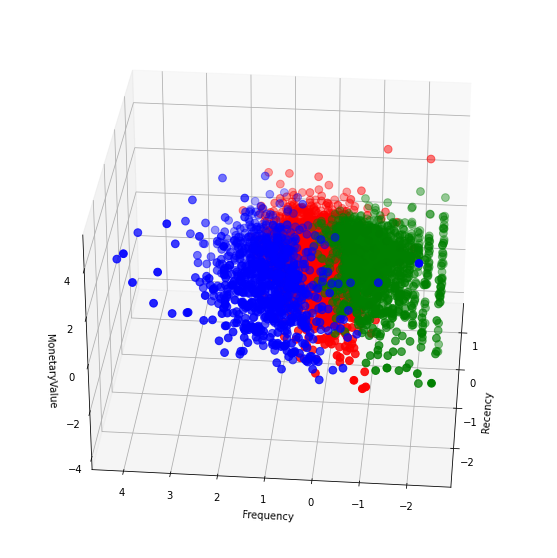

In [222]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(datamart_normalized.Recency[datamart_normalized.Cluster == 1], datamart_normalized.Frequency[datamart_normalized.Cluster == 1], datamart_normalized.MonetaryValue[datamart_normalized.Cluster == 1], c='blue', s=60)
ax.scatter(datamart_normalized.Recency[datamart_normalized.Cluster == 2], datamart_normalized.Frequency[datamart_normalized.Cluster == 2], datamart_normalized.MonetaryValue[datamart_normalized.Cluster == 2], c='red', s=60)
ax.scatter(datamart_normalized.Recency[datamart_normalized.Cluster == 3], datamart_normalized.Frequency[datamart_normalized.Cluster == 3], datamart_normalized.MonetaryValue[datamart_normalized.Cluster == 3], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('MonetaryValue')
plt.show()